Titanic Survival Prediction

Author: NDOU MPHO ALPHEUS

Domain: Data Science

Batch: June

Titanic Survival Prediction

Aim: To build a model that predicts whether a passenger on the Titanic survived or not based on features like age, gender, ticket class, and fare.

Import Libraries and Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the dataset
file_path = r"C:\Users\ndoum\Downloads\archive\Titanic-Dataset.csv" 
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


Data Preprocessing

In [17]:
# Check for missing values
print(data.isnull().sum())

# Fill missing values for 'Age' with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values for 'Embarked' with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column due to too many missing values
data.drop(columns=['Cabin'], inplace=True)

# Drop rows with missing 'Fare' values (if any)
data.dropna(subset=['Fare'], inplace=True)

# Display summary statistics of the dataset
print(data.describe())

# Encode categorical variables
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Drop unnecessary columns
data.drop(columns=['Name', 'Ticket'], inplace=True)

# Display the first few rows after preprocessing
print(data.head())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  


 Exploratory Data Analysis (EDA)

C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


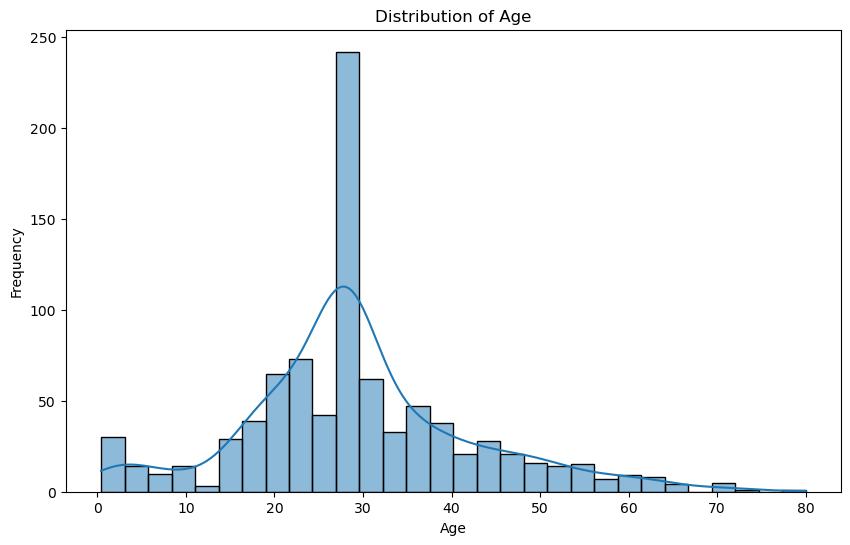

C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


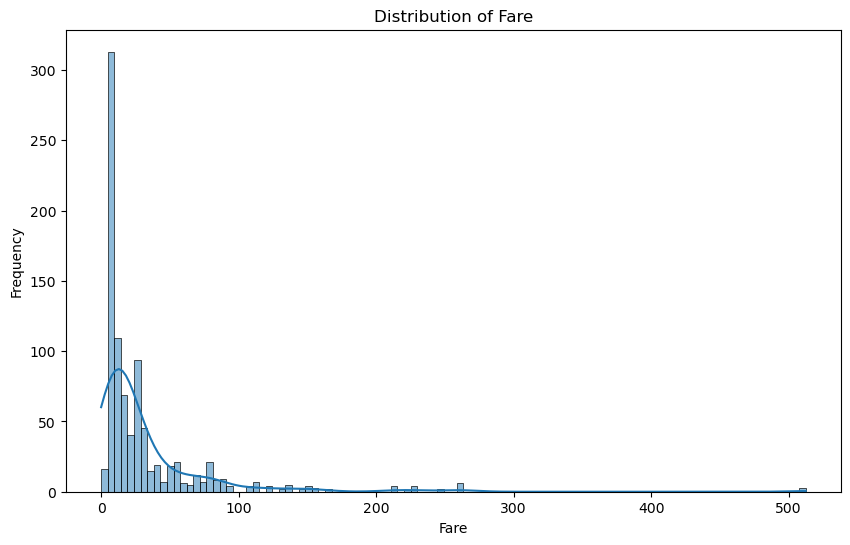

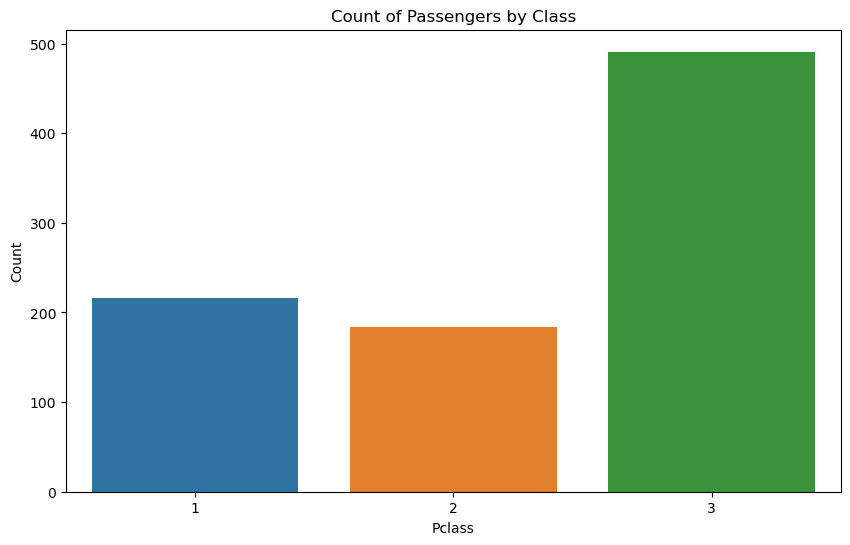

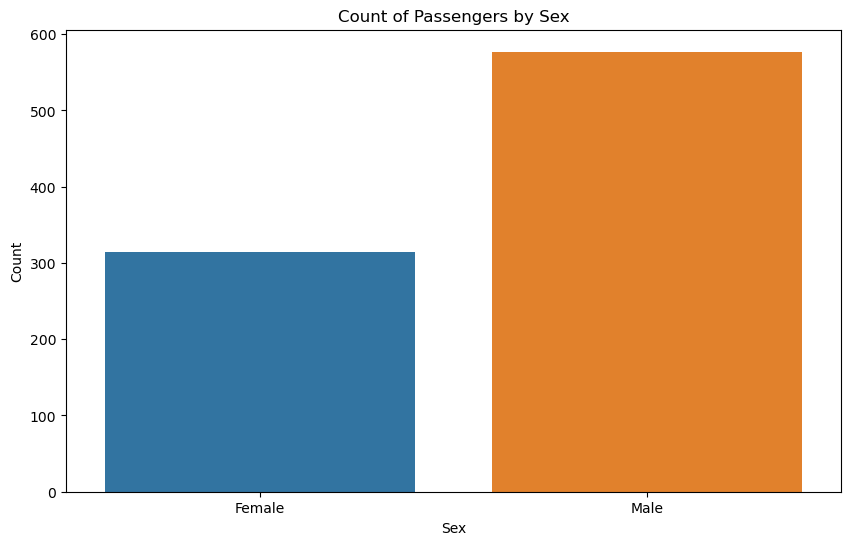

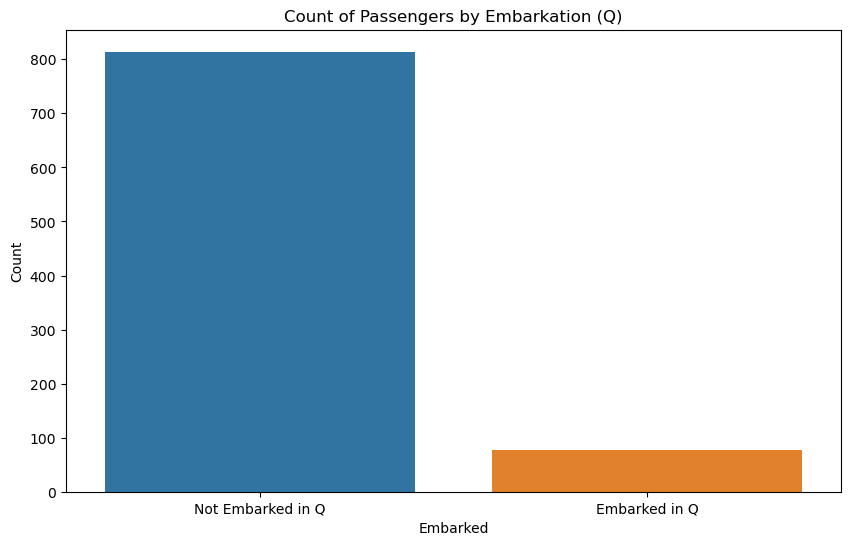

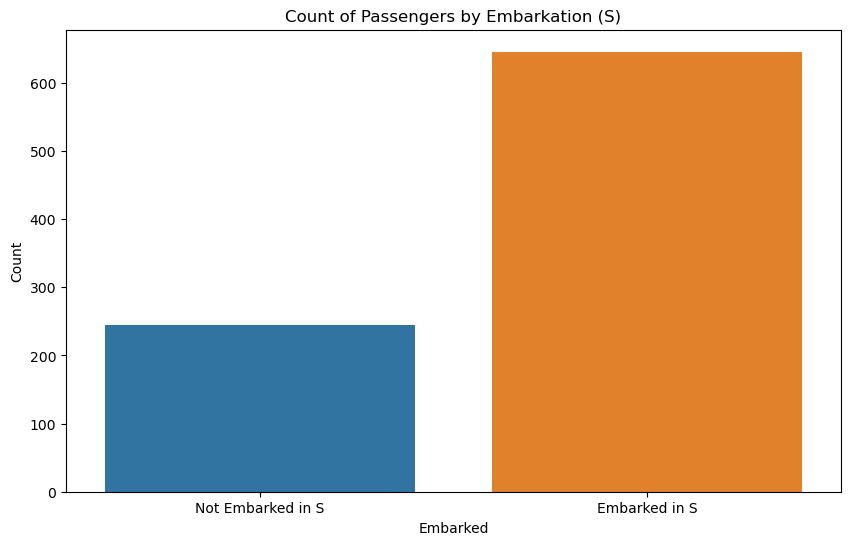

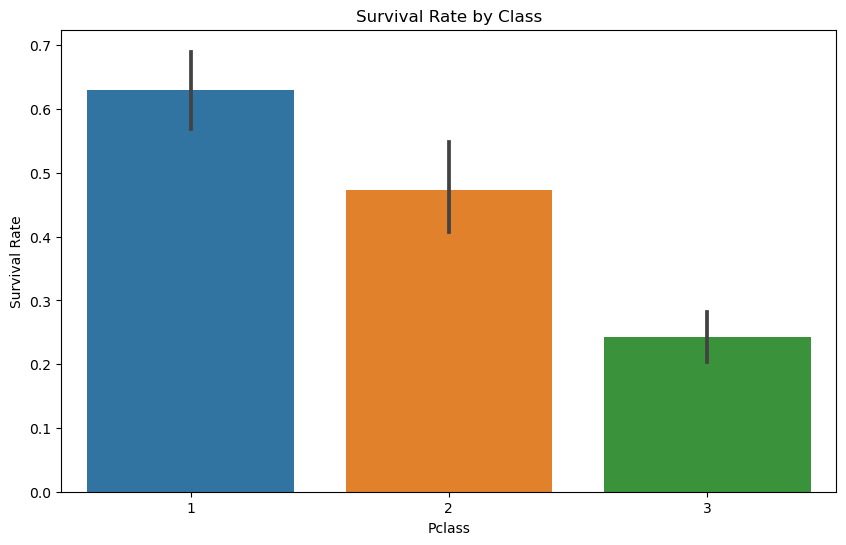

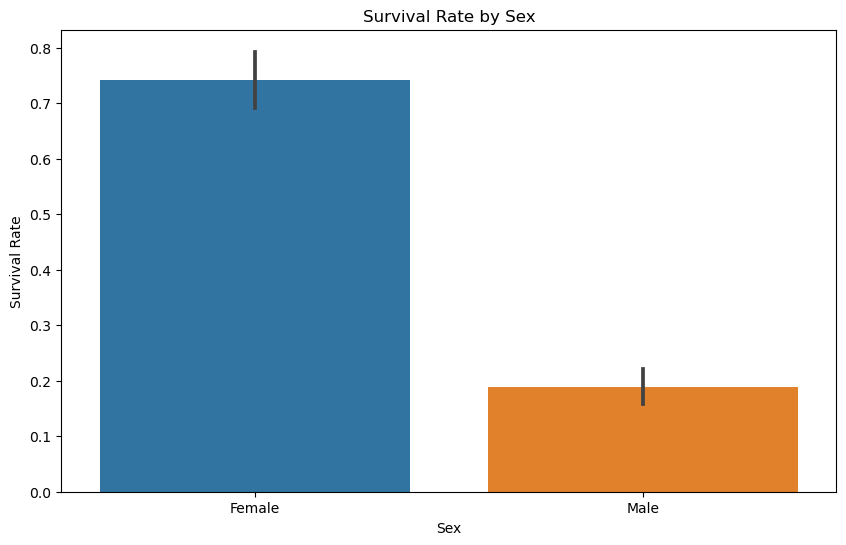

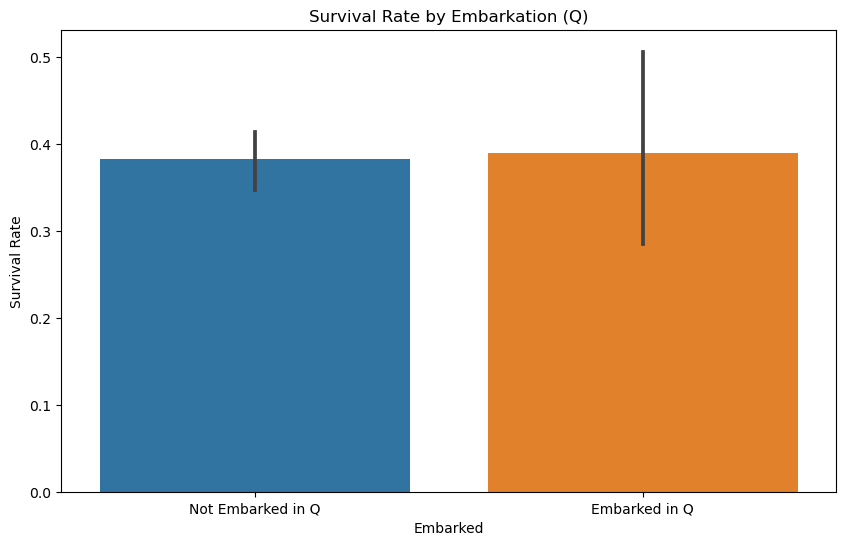

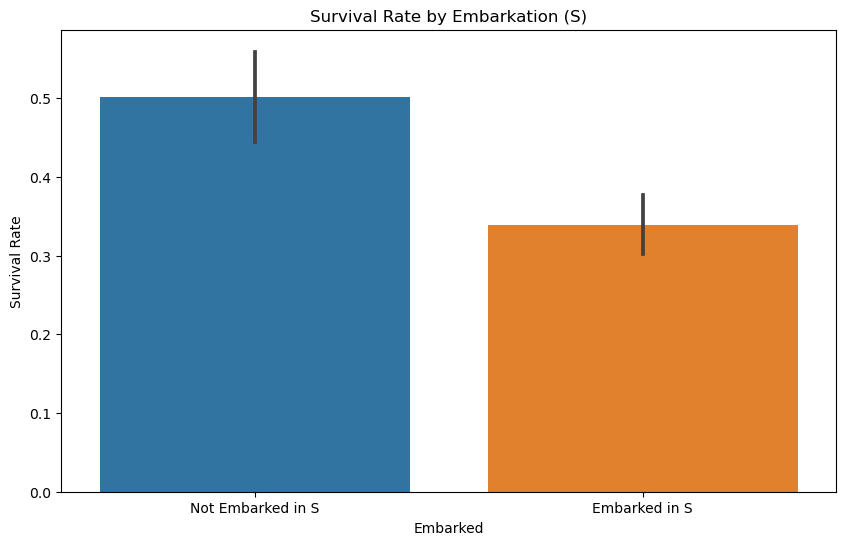

In [18]:
# Visualize the distribution of numerical features
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Fare'], kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Visualize the count of categorical features
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Pclass')
plt.title('Count of Passengers by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Sex_male')
plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Embarked_Q')
plt.title('Count of Passengers by Embarkation (Q)')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Embarked in Q', 'Embarked in Q'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Embarked_S')
plt.title('Count of Passengers by Embarkation (S)')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Embarked in S', 'Embarked in S'])
plt.show()

# Visualize the survival rate by different features
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Pclass', y='Survived')
plt.title('Survival Rate by Class')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Sex_male', y='Survived')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Embarked_Q', y='Survived')
plt.title('Survival Rate by Embarkation (Q)')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Not Embarked in Q', 'Embarked in Q'])
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Embarked_S', y='Survived')
plt.title('Survival Rate by Embarkation (S)')
plt.xlabel('Embarked')
plt.ylabel('Survival Rate')
plt.xticks(ticks=[0, 1], labels=['Not Embarked in S', 'Embarked in S'])
plt.show()


Split Data

In [19]:
# Define the features (X) and the target variable (y)
X = data.drop(columns=['Survived'])
y = data['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')


Training set shape: (623, 9), (623,)
Testing set shape: (268, 9), (268,)


Train Model

In [20]:
# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Evaluate Model

In [21]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


[[135  22]
 [ 30  81]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       157
           1       0.79      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.80      0.79      0.80       268
weighted avg       0.81      0.81      0.80       268

Accuracy: 0.8059701492537313


Visualize Results

C:\Users\ndoum\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


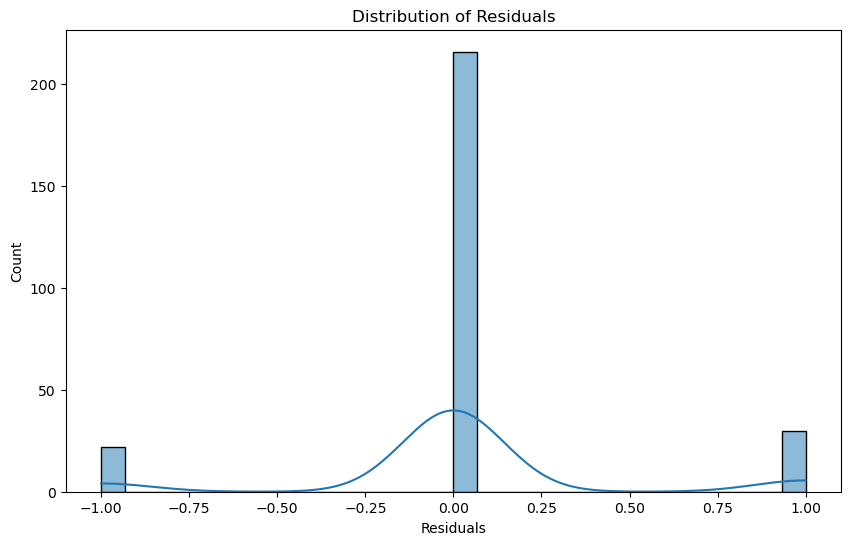

In [22]:
# Plot the true vs. predicted survival
plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


### Conclusion
In this project, I built a logistic regression model to predict the survival of passengers on the Titanic. I performed exploratory data analysis (EDA) to understand the data better and preprocess it for modeling. Our model achieved an accuracy of 0.806, demonstrating that certain features like class, age, and sex have a significant impact on the likelihood of survival.
